In [ ]:
# Instala o repositório diretamente do GitHub
!pip install git+https://github.com/PedroBritodSa/tiny_diffusion_model.git

# (Opcional) Reinicia o runtime para garantir importações limpas
import os
os.kill(os.getpid(), 9)


  Cloning https://github.com/PedroBritodSa/tiny_diffusion_model.git to /tmp/pip-req-build-xp4v6270
  Running command git clone --filter=blob:none --quiet https://github.com/PedroBritodSa/tiny_diffusion_model.git /tmp/pip-req-build-xp4v6270
  Resolved https://github.com/PedroBritodSa/tiny_diffusion_model.git to commit 7606e8136efb7b082f09976f5821ddd52787c819
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 87.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

# Direct usage of the tiny difussion model.

100%|██████████| 10000/10000 [02:24<00:00, 69.37it/s]


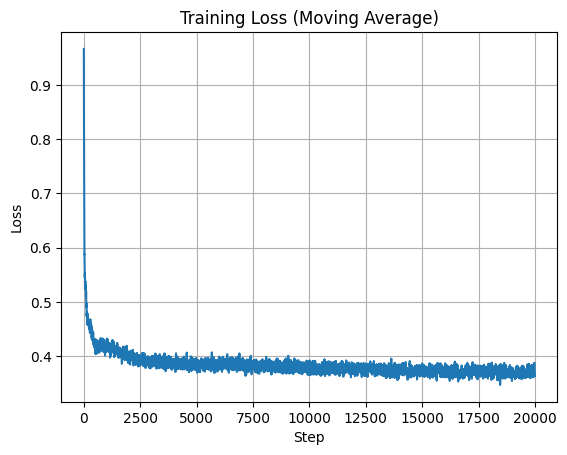

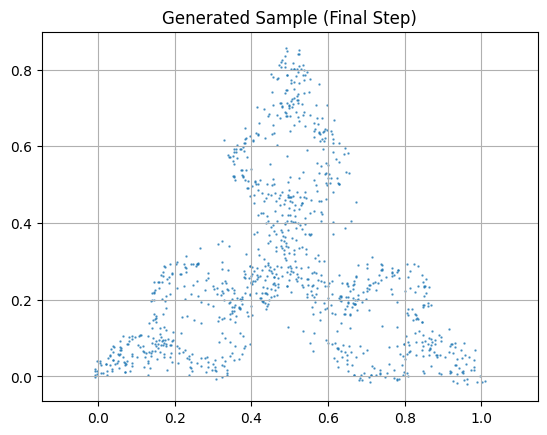

In [5]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
from tiny_diffusion_model import (
    TimeInputMLP,
    ScheduleLogLinear,
    KochSnowflake,
    training_loop,
    samples,
    moving_average
)

# Configs
BATCH_SIZE = 2048
EPOCHS = 10000
LR = 1e-3
DEVICE = 'cuda' if torch.cuda.is_available() else 'cpu'

# 1. Dataset
dataset = KochSnowflake(10000)
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)

# 2. Model and noise schedule
model = TimeInputMLP(dim=2).to(DEVICE)
schedule = ScheduleLogLinear(N=200, sigma_min=0.01, sigma_max=10)

# 3. Training loop using generator
trainer = training_loop(loader, model, schedule, epochs=EPOCHS, lr=LR)
losses = []

losses = [ns.loss.item() for ns in trainer]

# 4. Plotting the loss curve
plt.plot(moving_average(losses, 10))
plt.title("Training Loss (Moving Average)")
plt.xlabel("Step")
plt.ylabel("Loss")
plt.grid()
plt.show()

# 5. Sampling
sigmas = schedule.sample_sigmas(steps=50).to(DEVICE)
samples_list = []

for sample in samples(model, sigmas, batchsize=1024):
    samples_list.append(sample.cpu())

# 6. Plot final sample
final_sample = samples_list[-1].numpy()
plt.scatter(final_sample[:, 0], final_sample[:, 1], s=0.5, alpha=0.7)
plt.title("Generated Sample (Final Step)")
plt.axis('equal')
plt.grid(True)
plt.show()
